# **<<<<< BigMart Data Analysis andPrediction >>>>>**




The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.
Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.
 The data has missing values as some stores do not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.

# **Loading Packages and Data**

## **Import libraries**

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.linear_model
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error

## **Load the data**

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
data = pd.read_csv('/content/drive/MyDrive/Train.csv')

## **Data Structure and Content**

## **Exploratory Data Analysis**

In [15]:
print("Number of rows and columns:", data.shape)

Number of rows and columns: (8523, 12)


In [16]:
print("Summary statistics of numerical columns:")
print(data.describe())

Summary statistics of numerical columns:
       Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.643456         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.773750         0.026989    93.826500                1987.000000   
50%      12.600000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800  


In [17]:
print("Unique values in each column:")
print(data.nunique())

Unique values in each column:
Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64


### **Check for unique values**

In [18]:
print(data['Item_Fat_Content'].unique())
print(data['Item_Type'].unique())
print(data['Outlet_Establishment_Year'].sort_values().unique())
print(data['Outlet_Location_Type'].unique())
print(data['Outlet_Type'].unique())

['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
[1985 1987 1997 1998 1999 2002 2004 2007 2009]
['Tier 1' 'Tier 3' 'Tier 2']
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


### **Check for outliers**

Item_Weight                     Axes(0.125,0.11;0.133621x0.77)
Item_Visibility              Axes(0.285345,0.11;0.133621x0.77)
Item_MRP                      Axes(0.44569,0.11;0.133621x0.77)
Outlet_Establishment_Year    Axes(0.606034,0.11;0.133621x0.77)
Item_Outlet_Sales            Axes(0.766379,0.11;0.133621x0.77)
dtype: object

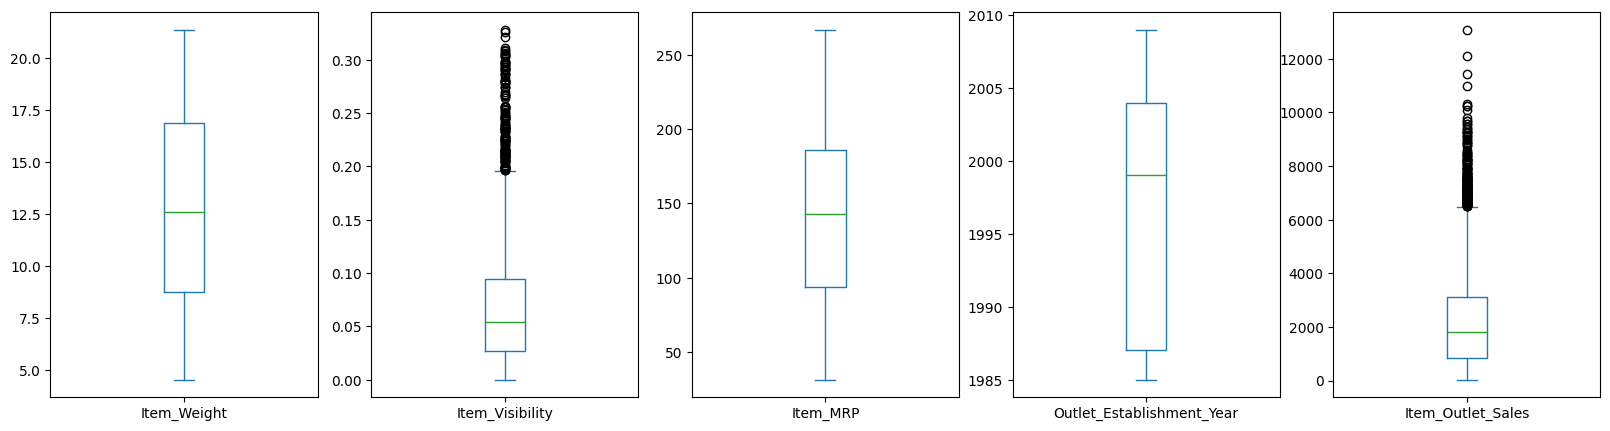

In [19]:
data.plot(kind='box', subplots=True, layout=(1,5), figsize=(20,5))

### **Remove outliers**

In [20]:
data = data.drop(data[data['Item_Weight'] > 1000].index)

Item_Weight                     Axes(0.125,0.11;0.133621x0.77)
Item_Visibility              Axes(0.285345,0.11;0.133621x0.77)
Item_MRP                      Axes(0.44569,0.11;0.133621x0.77)
Outlet_Establishment_Year    Axes(0.606034,0.11;0.133621x0.77)
Item_Outlet_Sales            Axes(0.766379,0.11;0.133621x0.77)
dtype: object

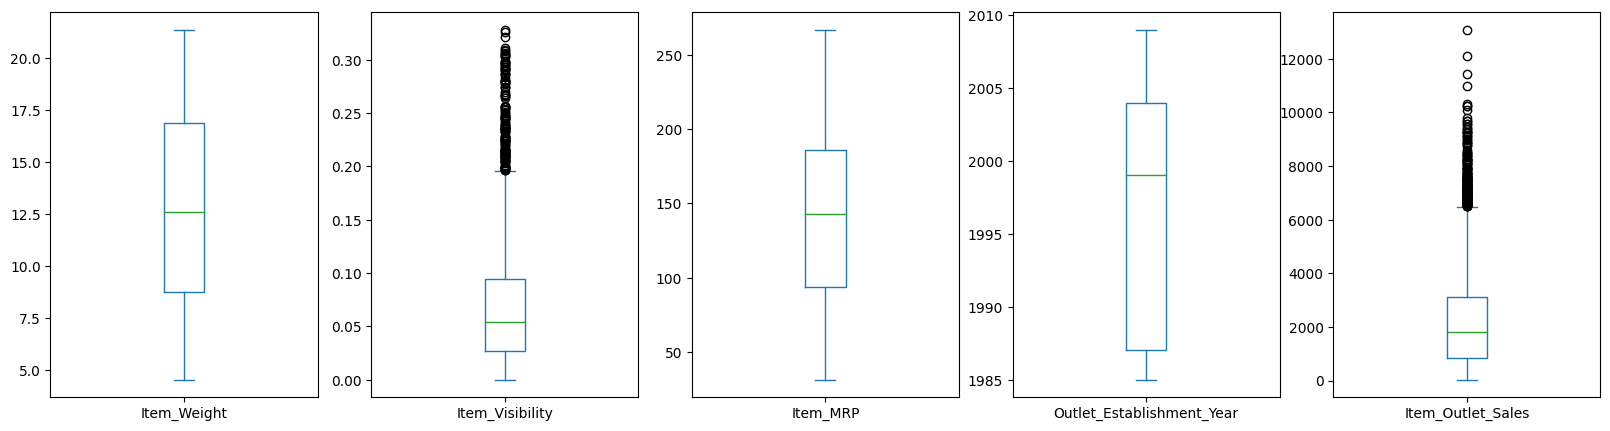

In [21]:
data.plot(kind='box', subplots=True, layout=(1,5), figsize=(20,5))

## **Univariate Analysis**

### **Plotting distribution of numerical variables**

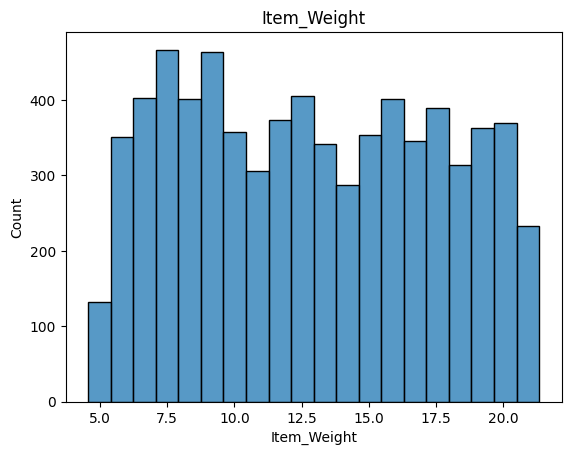

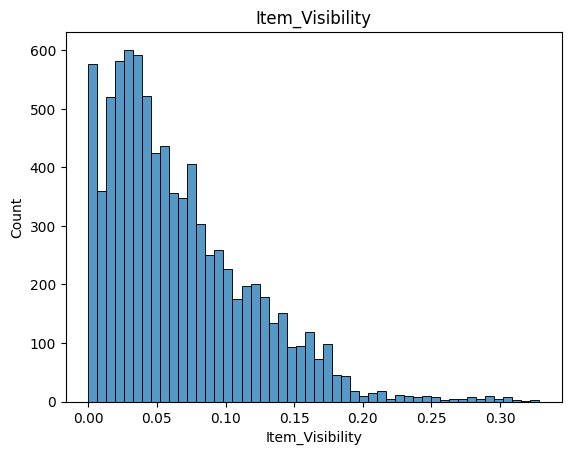

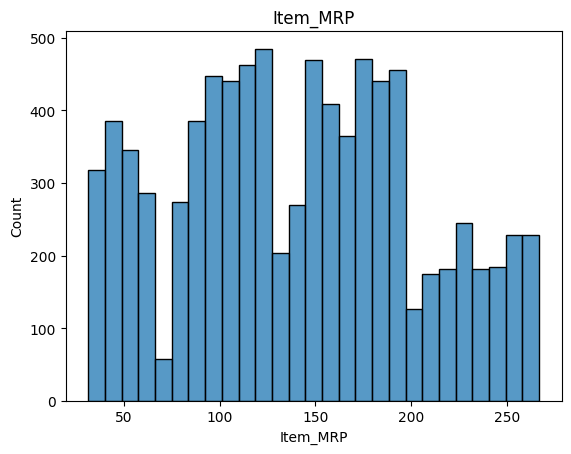

In [22]:
num_cols = ['Item_Weight', 'Item_Visibility', 'Item_MRP']
for column in num_cols:
    sns.histplot(data[column].dropna())
    plt.title(column)
    plt.show()

### **Plotting count of categorical variables**

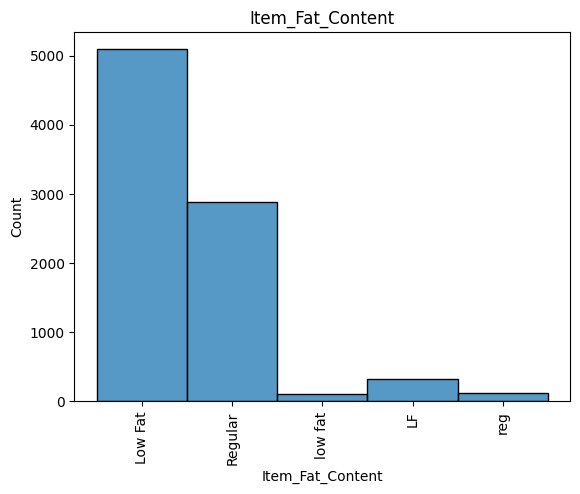

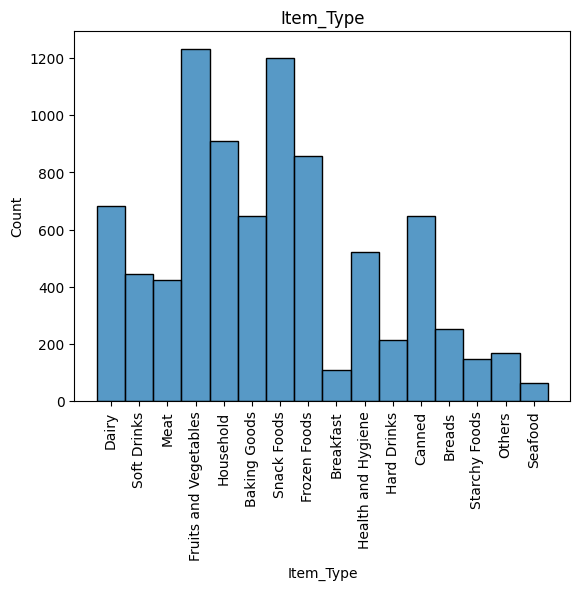

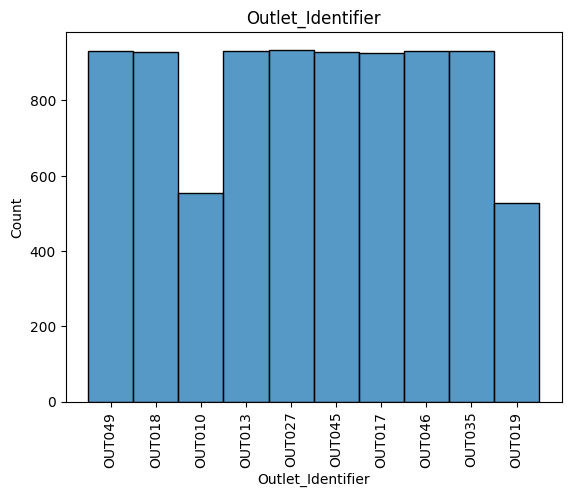

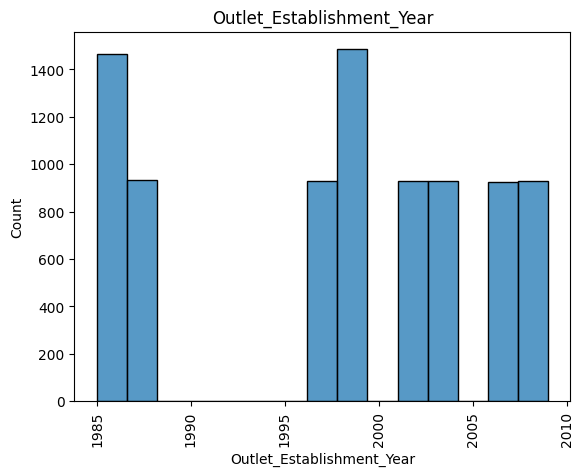

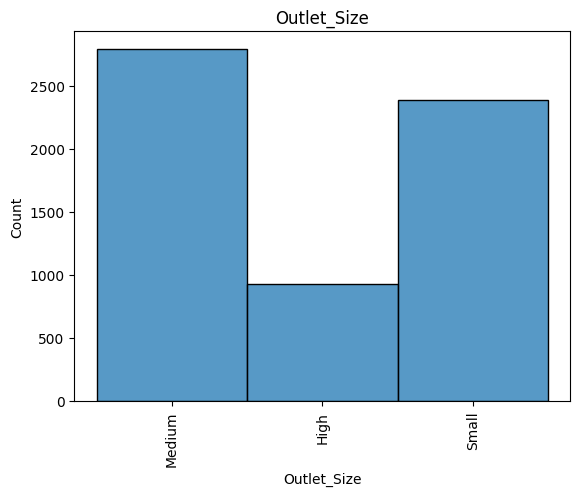

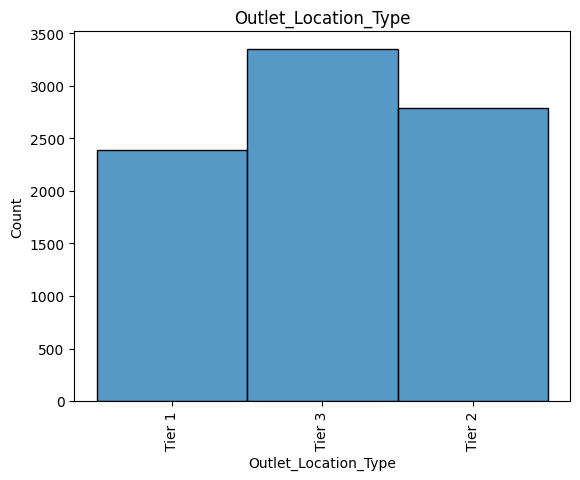

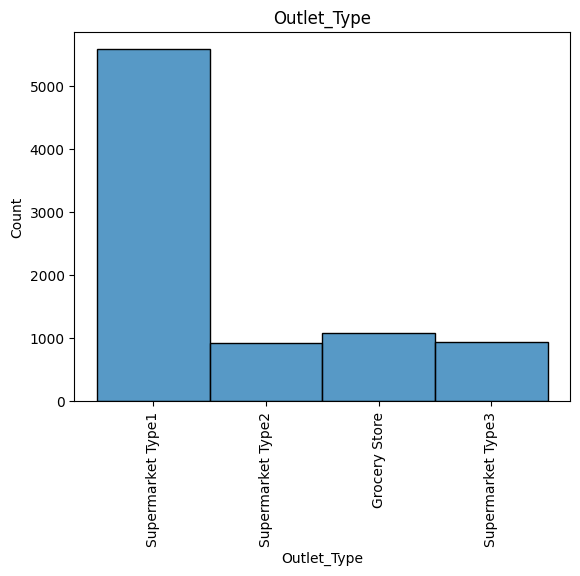

In [23]:
cat_cols = ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size',
            'Outlet_Location_Type', 'Outlet_Type']

for column in cat_cols:
  sns.histplot(data[column].dropna())
  plt.title(column)
  plt.xticks(rotation=90)
  plt.show()


## **Bivariate Analysis**

### **Scatterplot of numerical variables with target variable**

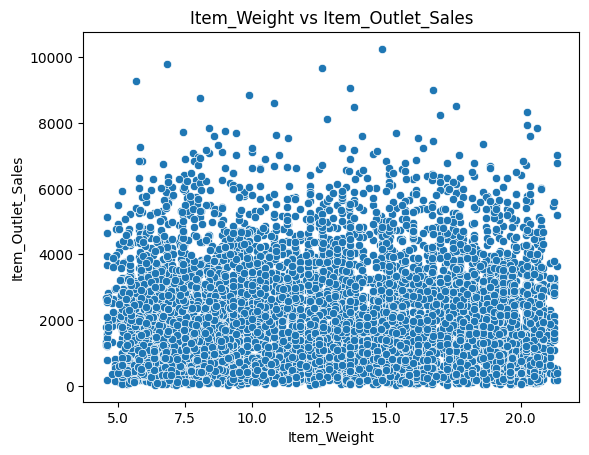

In [24]:
sns.scatterplot(x='Item_Weight', y='Item_Outlet_Sales', data=data)
plt.title("Item_Weight vs Item_Outlet_Sales")
plt.show()

### **Correlation matrix of numerical variables**

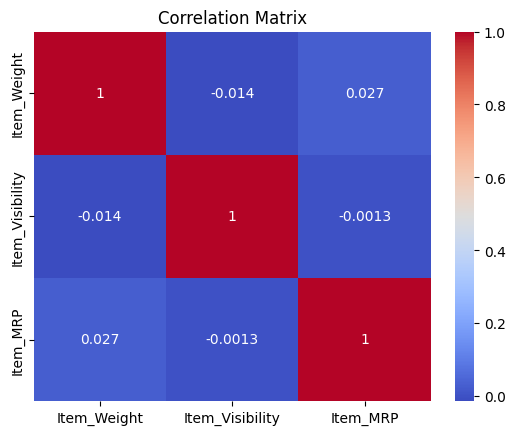

In [25]:
corr_matrix = data[num_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

## **Missing Value Treatment**

### **Check for missing values**

In [26]:
print(data.isnull().sum())

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


### **Fill missing values in numerical columns with mean**

In [27]:
data['Item_Weight'].fillna(data['Item_Weight'].mean(), inplace=True)


### **Fill missing values in categorical columns with mode**

In [28]:
data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0], inplace=True)

## **Feature Engineering**

### **Create new feature: Item_Type_Category**

In [29]:
data['Item_Type_Category'] = data['Item_Type'].apply(lambda x: x.split('_')[0])


In [30]:
data['Item_Fat_Content'] = data.Item_Fat_Content.replace(['LF', 'low fat', 'reg','Low Fat','Low Fat', 'Regular'])
data.Item_Fat_Content.value_counts()

Low Fat    8523
Name: Item_Fat_Content, dtype: int64

In [31]:
le = LabelEncoder()
label =  ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size',
            'Outlet_Location_Type', 'Outlet_Type']
for i in label:
    data[i] = le.fit_transform(data[i])
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Category
0,FDA15,9.30,0,0.016047,4,249.8092,9,4,1,0,1,3735.1380,Dairy
1,DRC01,5.92,0,0.019278,14,48.2692,3,8,1,2,2,443.4228,Soft Drinks
2,FDN15,17.50,0,0.016760,10,141.6180,9,4,1,0,1,2097.2700,Meat
3,FDX07,19.20,0,0.000000,6,182.0950,0,3,1,2,0,732.3800,Fruits and Vegetables
4,NCD19,8.93,0,0.000000,9,53.8614,1,1,0,2,1,994.7052,Household


## **Encoding Categorical Variables**

In [32]:
categorical_columns = [column for column in data.columns if data[column].dtype.name == "category"]

## **Label encoding**

In [33]:
label_encoder = LabelEncoder()
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])




In [34]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Category
0,FDA15,9.30,0,0.016047,4,249.8092,9,4,1,0,1,3735.1380,Dairy
1,DRC01,5.92,0,0.019278,14,48.2692,3,8,1,2,2,443.4228,Soft Drinks
2,FDN15,17.50,0,0.016760,10,141.6180,9,4,1,0,1,2097.2700,Meat
3,FDX07,19.20,0,0.000000,6,182.0950,0,3,1,2,0,732.3800,Fruits and Vegetables
4,NCD19,8.93,0,0.000000,9,53.8614,1,1,0,2,1,994.7052,Household


## **Preprocessing**

In [35]:
data.drop(['Item_Type_Category','Item_Identifier'],axis=1,inplace=True)

In [36]:
y = data['Item_Outlet_Sales']
X = data.drop('Item_Outlet_Sales', axis=1)

In [37]:
data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0,0.016047,4,249.8092,9,4,1,0,1,3735.1380
1,5.92,0,0.019278,14,48.2692,3,8,1,2,2,443.4228
2,17.50,0,0.016760,10,141.6180,9,4,1,0,1,2097.2700
3,19.20,0,0.000000,6,182.0950,0,3,1,2,0,732.3800
4,8.93,0,0.000000,9,53.8614,1,1,0,2,1,994.7052


### **Split data into train and test sets**

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## **Modeling**

### **Linear Regression**

In [39]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred = linear_reg.predict(X_test)

linear_reg_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Linear Regression RMSE:", linear_reg_rmse)

linear_reg_mae = mean_absolute_error(y_test, y_pred)
print("Linear Regression MAE:", linear_reg_mae)

Linear Regression RMSE: 1194.4491252635944
Linear Regression MAE: 911.1010007123948


### **Regularized Linear Regression (Ridge)**

In [40]:
ridge_reg = Ridge(alpha=0.5)
ridge_reg.fit(X_train, y_train)
y_pred = ridge_reg.predict(X_test)

ridge_reg_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Ridge Regression RMSE:", ridge_reg_rmse)

ridge_reg_mae = mean_absolute_error(y_test, y_pred)
print("Ridge Regression MAE:", ridge_reg_mae)

Ridge Regression RMSE: 1194.4426253528866
Ridge Regression MAE: 911.0873942769493


### **Regularized Linear Regression (Lasso)**

In [41]:
lasso_reg = Lasso(alpha=0.5)
lasso_reg.fit(X_train, y_train)
y_pred = lasso_reg.predict(X_test)
lasso_reg_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Lasso Regression RMSE:", lasso_reg_rmse)

lasso_reg_mae = mean_absolute_error(y_test, y_pred)
print("Lasso Regression MAE:", lasso_reg_mae)

Lasso Regression RMSE: 1194.4464857715066
Lasso Regression MAE: 911.0338215782441


### **Random Forest**

In [42]:
rf_reg = RandomForestRegressor(n_estimators=100)
rf_reg.fit(X_train, y_train)
y_pred = rf_reg.predict(X_test)
rf_reg_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Random Forest RMSE:", rf_reg_rmse)


rf_reg_mae = mean_absolute_error(y_test, y_pred)
print("Random Forest MAE:", rf_reg_mae)

Random Forest RMSE: 1141.2627742797338
Random Forest MAE: 812.5057849571848


### **XGBoost**

In [43]:
xgb_reg = XGBRegressor(n_estimators=100)
xgb_reg.fit(X_train, y_train)
y_pred = xgb_reg.predict(X_test)
xgb_reg_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("XGBoost RMSE:", xgb_reg_rmse)

xgb_reg_mae = mean_absolute_error(y_test, y_pred)
print("XGBoost MAE:", xgb_reg_mae)

XGBoost RMSE: 1193.7114887492628
XGBoost MAE: 842.7821055683268


Summarty

In this Project:

**First**, we load the necessary packages and import the database.

We **then** proceed to explore the data visually and statistically to gain insights and understand the relationships between variables.

**Following that**, we analyze individual variables to understand their distribution and characteristics (univariate analysis) and analyze the relationships between pairs of variables to identify correlations and patterns (bivariate analysis).

We **then** handle missing values in the database by either imputing them or removing the corresponding rows/columns.

**After that**, we create new features from the existing variables to improve the model's performance through feature engineering.

**Next**, we convert categorical variables into numerical representations to facilitate modeling through encoding.
This can involve label encoding, where we assign unique numerical labels to each category within a variable, or one hot encoding, where we convert categorical variables with multiple categories into binary columns.
We preprocess the data by scaling, normalizing, or transforming variables to meet modeling requirements.

**Finally**, we apply various machine learning models to the preprocessed data, such as linear regression, regularized linear regression algorithms like Ridge or Lasso, random forest, and XGBoost, to predict outcomes.